In this notebook, I will implement a linear regression from scratch using Python.

In [2]:
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
data = pd.DataFrame({'x': [1, 2, 4, 3, 5], 'y': [1, 3, 3, 2, 5]})

In [4]:
data

,x,y
0,1,1
1,2,3
2,4,3
3,3,2
4,5,5


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Relationship between x and y')

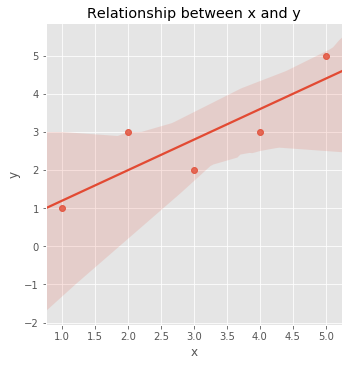

In [5]:
sns.lmplot(x='x', y='y', data=data)
plt.title('Relationship between x and y')

As we can see, the relationship between x and y is approximately normal. Thus, a linear regression might be a good fit.
In this case, as we only have one input variable, I am going to implement a simple linear regression.

\begin{align}
y & = \beta_0 + \beta_1x
\end{align}

### Calculating the beta coefficients

In [18]:
mean_x = np.mean(data.x)
mean_y = np.mean(data.y)
print('The mean of x is {} and the mean of y is {}'.format(mean_x, mean_y))

The mean of x is 3.0 and the mean of y is 2.8


In [28]:
numerator1 = data.x - mean_x
numerator2 = data.y - mean_y
print('x values: \n', numerator1, '\n\n', 'y values: \n', numerator2)

x values: 
 0   -2.0
1   -1.0
2    1.0
3    0.0
4    2.0
Name: x, dtype: float64 

 y values: 
 0   -1.8
1    0.2
2    0.2
3   -0.8
4    2.2
Name: y, dtype: float64


In [24]:
numerator = np.sum(numerator1 * numerator2)

In [25]:
numerator

8.0

In [31]:
denominator = np.sum(numerator1 **2)

In [32]:
denominator

10.0

In [33]:
beta1 = numerator/denominator
print('beta1 is: {}'.format(beta1))

beta1 is: 0.8


Now that we have beta1, we can easily compute beta0:

In [35]:
beta0 = mean_y - beta1 * mean_x
print('beta0 is: {}'.format(beta0))

beta0 is: 0.39999999999999947


Finally, we can put together our simple linear regression equation:

\begin{align}
y & = 0.4 + 0.8x
\end{align}

### Making Predictions

In [36]:
predicted_y = beta0 + beta1 * data.x

In [40]:
after_pred = pd.concat([data.x, data.y, predicted_y.rename('prediction')], axis=1)

In [41]:
after_pred

,x,y,prediction
0,1,1,1.2
1,2,3,2.0
2,4,3,3.6
3,3,2,2.8
4,5,5,4.4


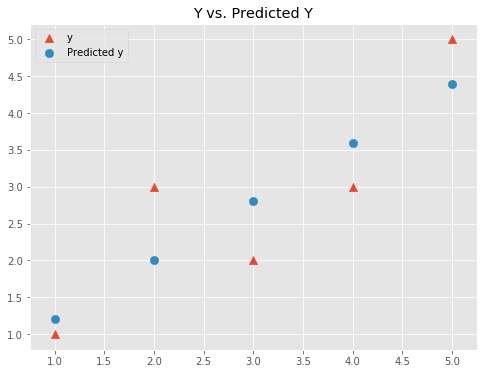

In [65]:
plt.figure(figsize=(8,6))
original_y = plt.scatter(data.x, data.y, marker ='^', s=70)
predicted_y = plt.scatter(data.x, after_pred.prediction, s=70)
plt.title('Y vs. Predicted Y')
plt.legend((original_y, predicted_y), ('y', 'Predicted y'))

### Estimating Error

In our case, we are going to compute the RMSE (Root Mean Squared Error)

In [68]:
rmse = math.sqrt(np.mean((after_pred.prediction-data.y)**2))

In [69]:
print('Our RMSE is {}'.format(rmse))

Our RMSE is 0.692820323027551


On average, each of our predictions is wrong by approx. 0.6928